# Import libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.impute import SimpleImputer

# load data

In [96]:
df = pd.read_csv("C:\\Users\\Win\\Desktop\\master\\term 3\\Basics Of Data science\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
df.shape

(1460, 81)

In [87]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# filling missing value

Let's see the number of missing in each column

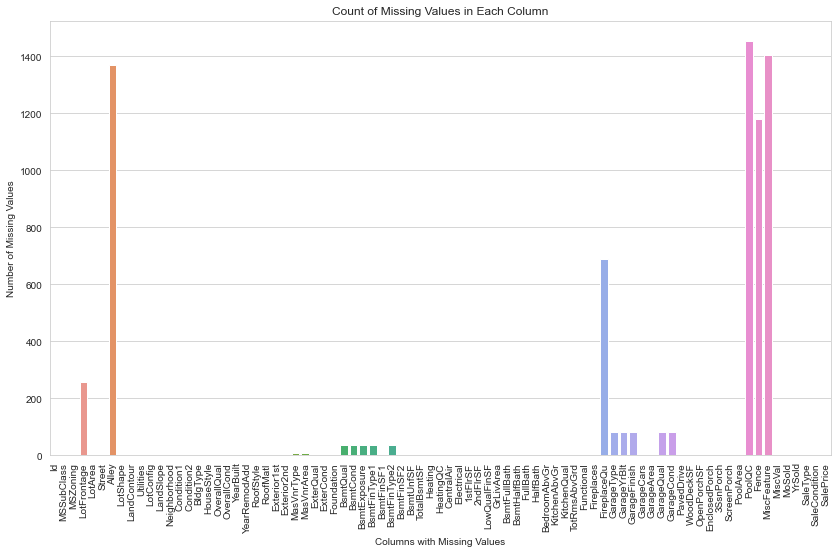

In [7]:
missing_values = df.isna().sum()
plt.figure(figsize=(14, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Columns with Missing Values')
plt.ylabel('Number of Missing Values')
plt.title('Count of Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [90]:
# Columns with missing values
na_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum().sort_values(ascending=False), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

,Number_missing,Percentage_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


The first four features have too much missing values, so we should drop them.
In the other numeric features , we fill null values with median and for categorical features, we fill them them

In [97]:
def pre_process(df):
    df=df.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)
    num_df=df.select_dtypes(include='number')
    num_cols=num_df.columns
    for col in num_cols:
        df[col]=df[col].fillna(df[col].median())
    str_df=df.select_dtypes(include='object')
    str_cols=str_df.columns
    for col in str_cols:
        df[col]=df[col].fillna(df['LotShape'].value_counts().idxmax()) 
    return df     

ptr_df=pre_process(df)
ptr_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Q1.What are The MSSubClass and why it is important?

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

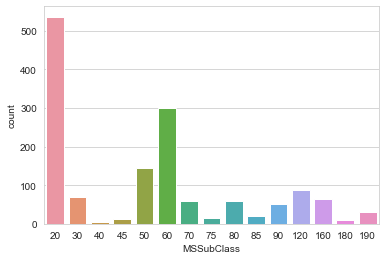

In [99]:
sns.countplot(data = ptr_df, x ='MSSubClass')

In [115]:
correlation = ptr_df['MSSubClass'].corr(ptr_df['SalePrice'])
correlation.round(2)

-0.08

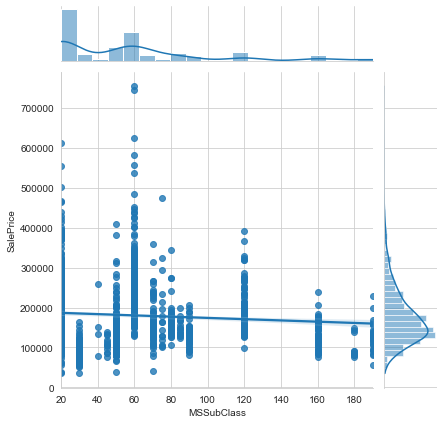

In [107]:
sns.jointplot(data = ptr_df, x = 'MSSubClass',y = 'SalePrice', kind = 'reg')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

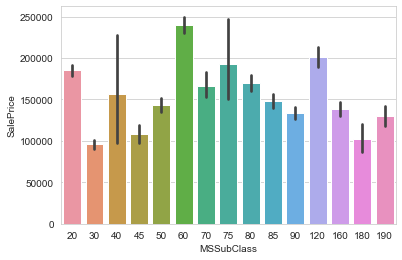

In [113]:
sns.barplot(data = ptr_df, x = 'MSSubClass', y= 'SalePrice')

"This plot shows the mean sale price for each class in MSSubclass."

<AxesSubplot:xlabel='MSSubClass', ylabel='LotShape'>

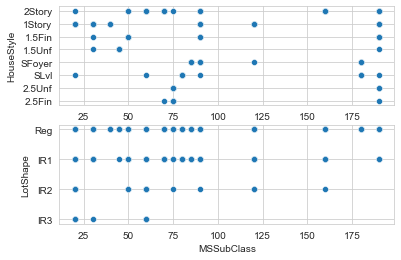

In [14]:
plt.subplot(2,1,1)
sns.scatterplot(data = ptr_df, x = 'MSSubClass',y = 'HouseStyle')
plt.subplot(2,1,2)
sns.scatterplot(data = ptr_df, x = 'MSSubClass',y = 'LotShape')


I tried to find relationship for MSSubclass but there is no relationship between them .

## 2. How does the overall quality (OverallQual) of a house relate to its sale price?

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

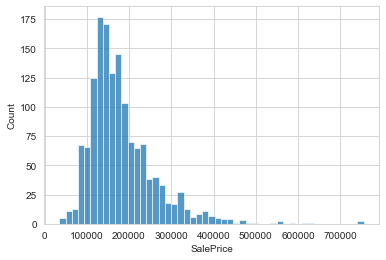

In [116]:
sns.histplot(data = ptr_df, x ='SalePrice')

Let's dig deeper on OverallQual

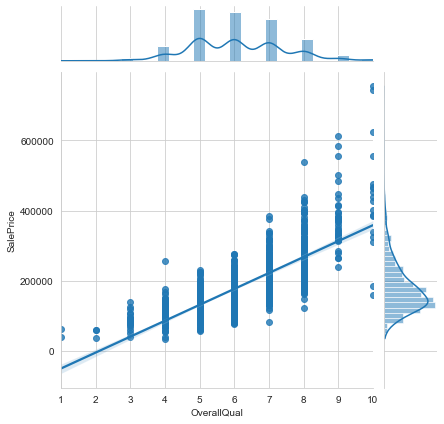

In [117]:
sns.jointplot(data = ptr_df, x = 'OverallQual',y = 'SalePrice',kind='reg' )

Notice that:
>
>1.The maximum value of OverallQual is for value 5
>
>2.Price strictly increases as Overall Quality increases.

### Shapiro test : Tests whether a data sample has a Gaussian distribution.  

In [121]:
from scipy.stats import shapiro

data = ptr_df['OverallQual']
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.948, p=0.948
Probably not Gaussian


In [119]:
data = ptr_df['SalePrice']
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.870, p=0.870
Probably not Gaussian


### spearmanr:Tests whether a data sample is montonically separable.

In [19]:
from scipy.stats import spearmanr

data1 = ptr_df['OverallQual']
data2 = ptr_df['SalePrice']
stat, p = spearmanr(data1, data2)
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.81, p=0.810
Probably dependent


In [122]:
correlation = ptr_df['OverallQual'].corr(ptr_df['SalePrice'])
correlation.round(2)

0.79

They have high correlation.

## 3.How do the different types of heating (Heating) affect the sale prices?

Let's dig deeper on Heating

<AxesSubplot:xlabel='Heating', ylabel='count'>

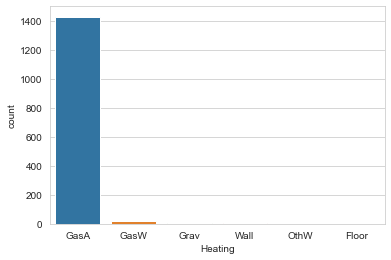

In [125]:
sns.countplot(data = ptr_df, x = 'Heating')

GasA is the most popular

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

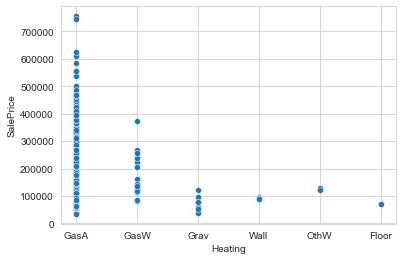

In [21]:
sns.scatterplot(data = df, x = 'Heating',y = 'SalePrice' )

### Kruskal-Wallis H Test : Distribution between two independent samples are significantly equal or not.

In [123]:
from scipy.stats import kruskal

heating_groups = []
for heating_type in ptr_df['Heating'].unique():
    heating_groups.append(ptr_df[ptr_df['Heating'] == heating_type]['SalePrice'])

stat, p = kruskal(*heating_groups)
print('Kruskal-Wallis - stat={0:.3f}, p={0:.3f}'.format(stat, p))

if p < 0.05:
    print('There are significant differences in sale prices across different heating types.')
else:
    print('There may not be significant differences in sale prices across different heating types.')


Kruskal-Wallis - stat=33.267, p=33.267
There are significant differences in sale prices across different heating types.


## 4.How do the different types of utilities (Utilities) available in a property relate to sale prices?

<AxesSubplot:xlabel='Utilities', ylabel='count'>

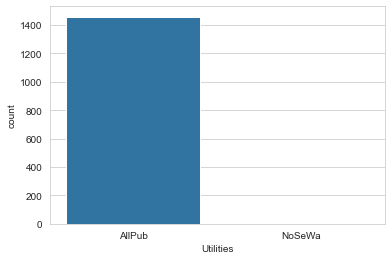

In [25]:
sns.countplot(data = df, x = 'Utilities')

In [126]:
ptr_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

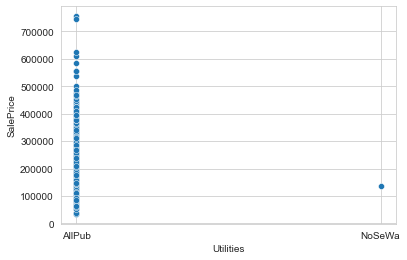

In [129]:
sns.scatterplot(data = ptr_df, x = 'Utilities',y = 'SalePrice' )

### Kruskal-Wallis H Test : Distribution between two independent samples are significantly equal or not.

In [130]:
from scipy.stats import kruskal

Utilities_groups = []
for Utilities_type in ptr_df['Utilities'].unique():
    Utilities_groups.append(ptr_df[ptr_df['Utilities'] == Utilities_type]['SalePrice'])

stat, p = kruskal(*Utilities_groups)
print('Kruskal-Wallis - stat={0:.3f}, p={0:.3f}'.format(stat, p))

if p < 0.05:
    print('There are significant differences in sale prices across different utilities types.')
else:
    print('There may not be significant differences in sale prices across different utilities types.')


Kruskal-Wallis - stat=0.407, p=0.407
There may not be significant differences in sale prices across different utilities types.


In [33]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

## 5. How does the paved drive relate to its sale price?

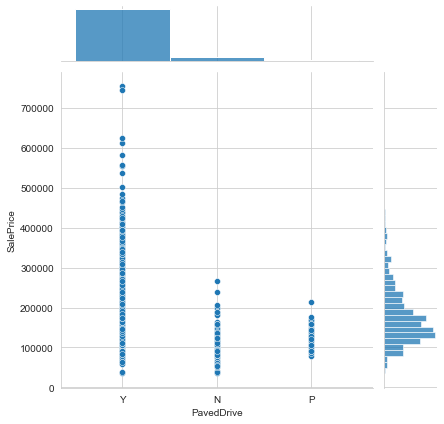

In [131]:
sns.jointplot(data = ptr_df, x = 'PavedDrive',y = 'SalePrice' )

In [132]:
ptr_df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [36]:
from scipy.stats import kruskal

paveddrive_groups = []
for paveddrive_type in df['PavedDrive'].unique():
    paveddrive_groups.append(df[df['PavedDrive'] == paveddrive_type]['SalePrice'])

stat, p = kruskal(*paveddrive_groups)
print('Kruskal-Wallis - stat={0:.3f}, p={0:.3f}'.format(stat, p))

if p < 0.05:
    print('There are significant differences in sale prices across different paveddrive types.')
else:
    print('There may not be significant differences in sale prices across different paveddrive types.')


Kruskal-Wallis - stat=115.839, p=115.839
There are significant differences in sale prices across different paveddrive types.


## 6.Is there a significant difference in the sale price based on kitchen quality, fireplace quality, and garage quality.

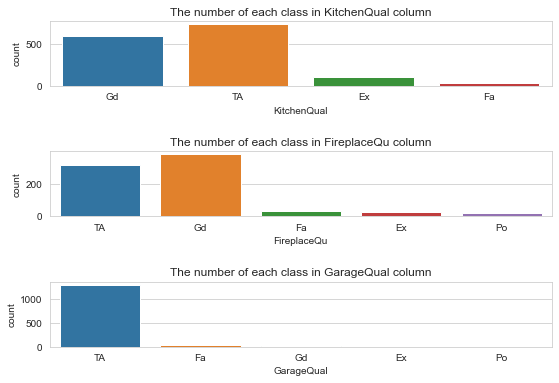

In [140]:
plt.figure(figsize = (9, 6))
plt.subplot(3,1,1)
sns.countplot(data = df, x = 'KitchenQual')
plt.title('The number of each class in KitchenQual column')
plt.subplot(3,1,2)
sns.countplot(data = df, x = 'FireplaceQu')
plt.title('The number of each class in FireplaceQu column')
plt.subplot(3,1,3)
sns.countplot(data = df, x = 'GarageQual')
plt.title('The number of each class in GarageQual column')
plt.subplots_adjust(hspace=1)

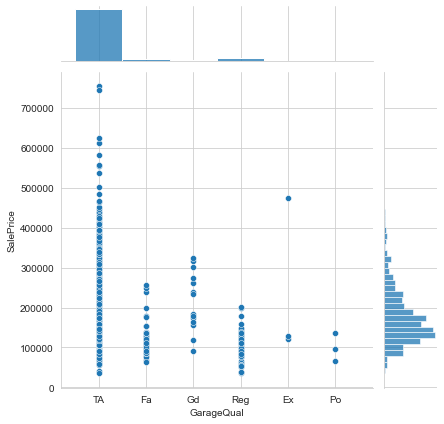

In [142]:
sns.jointplot(data = ptr_df, x = 'GarageQual',y = 'SalePrice' )

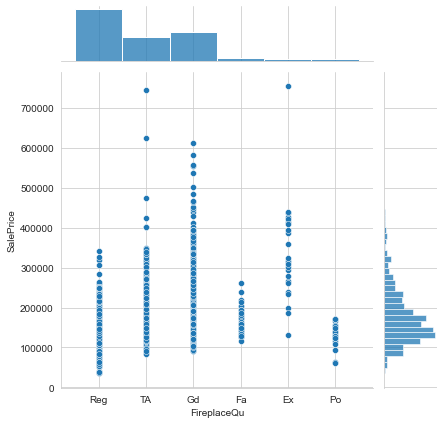

In [149]:
sns.jointplot(data = ptr_df, x = 'FireplaceQu',y = 'SalePrice' )

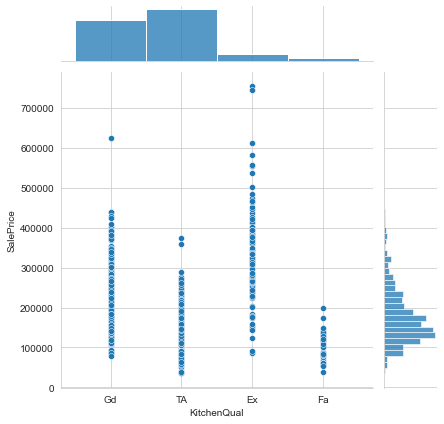

In [150]:
sns.jointplot(data = ptr_df, x = 'KitchenQual',y = 'SalePrice' )

In [151]:
from scipy.stats import kruskal

kitchen_qual_groups = []
for qual in ptr_df['KitchenQual'].unique():
    kitchen_qual_groups.append(ptr_df[ptr_df['KitchenQual'] == qual]['SalePrice'])

fireplace_qual_groups = []
for qual in ptr_df['FireplaceQu'].unique():
    fireplace_qual_groups.append(ptr_df[ptr_df['FireplaceQu'] == qual]['SalePrice'])

garage_qual_groups = []
for qual in ptr_df['GarageQual'].unique():
    garage_qual_groups.append(ptr_df[ptr_df['GarageQual'] == qual]['SalePrice'])

stat, p = kruskal(*kitchen_qual_groups, *fireplace_qual_groups, *garage_qual_groups)
print('Kruskal-Wallis test - stat={:.3f}, p={:.3f}'.format(stat, p))

if p < 0.05:
    print('There is a significant difference in the sale price based on kitchen quality, fireplace quality, and garage quality.')
else:
    print('There may not be a significant difference in the sale price based on kitchen quality, fireplace quality, and garage quality.')

Kruskal-Wallis test - stat=1315.984, p=0.000
There is a significant difference in the sale price based on kitchen quality, fireplace quality, and garage quality.


## 7.Is there a significant difference in the sale price based year sold.

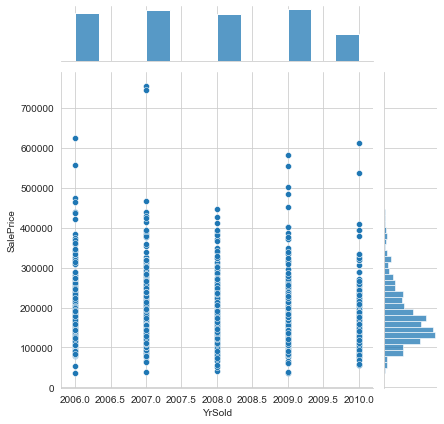

In [152]:
sns.jointplot(data = ptr_df, x = 'YrSold',y = 'SalePrice' )

In [153]:
from scipy.stats import spearmanr
data1 = ptr_df['YrSold']
data2 = ptr_df['SalePrice']
stat, p = spearmanr(data1, data2)
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.0299, p=-0.030
Probably independent


In [154]:
correlation = ptr_df['YrSold'].corr(ptr_df['SalePrice'])
correlation.round(2)

-0.03

## 8.Is there a significant difference in the sale price based year built.

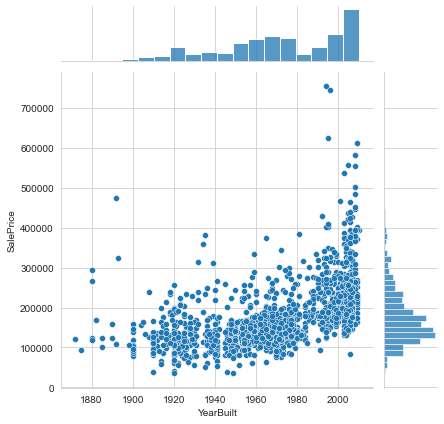

In [65]:
sns.jointplot(data = df, x = 'YearBuilt',y = 'SalePrice' )

In [155]:
from scipy.stats import spearmanr
data1 = ptr_df['YearBuilt']
data2 = ptr_df['SalePrice']
stat, p = spearmanr(data1, data2)
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.653, p=0.653
Probably dependent


In [156]:
correlation = ptr_df['YearBuilt'].corr(ptr_df['SalePrice'])
correlation.round(2)

0.52

## 9.Is there a significant difference in the sale price based Central air.

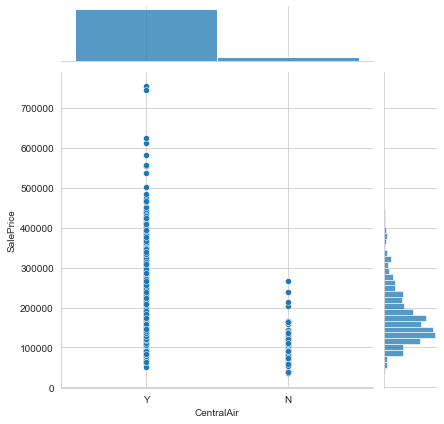

In [169]:
sns.jointplot(data = ptr_df, x = 'CentralAir',y = 'SalePrice' )

In [171]:
from scipy.stats import kruskal

CentralAir_groups = []
for CentralAir_type in ptr_df['CentralAir'].unique():
    CentralAir_groups.append(ptr_df[ptr_df['CentralAir'] == CentralAir_type]['SalePrice'])

stat, p = kruskal(*CentralAir_groups)
print('Kruskal-Wallis - stat={0:.3f}, p={0:.3f}'.format(stat, p))

if p < 0.05:
    print('There are significant differences in sale prices across different CentralAir types.')
else:
    print('There may not be significant differences in sale prices across different CentralAir types.')

Kruskal-Wallis - stat=143.198, p=143.198
There are significant differences in sale prices across different heating types.
